In [ ]:
# 데이터
import pandas as pd

credit_df=pd.read_csv(r'E:\남궁은\#2021_ADP_실기준비\0_data\PART 05 실습용 데이터\german_credit_dataset.csv')
credit_df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
# 목표변수와 나머지 변수들을 따로 저장

x = credit_df.iloc[ : , 1:21 ]# 나머지 IV
y = credit_df.iloc[:,0] # credit.rating을 DV로 지정

In [ ]:
# 데이터셋 나누고 라벨 분포 확인

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 의사결정트리 만들기 (rpart 최대 깊이는 5개, 노드에서 최소 관측치는 15개 이상)
clf=DecisionTreeClassifier(max_depth=5, min_samples_split=15, random_state=153)

In [ ]:
# 모델 학습 (training set에서)
clf.fit( x_train, y_train )

DecisionTreeClassifier(max_depth=5, min_samples_split=15, random_state=153)

In [ ]:
# 모델의 정답에 대한 정보 확인
clf.classes_

array([0, 1], dtype=int64)

In [ ]:
# 예측 (x_test)
preds1=clf.predict(x_test)

In [ ]:
# 예측 probability (x_test)
preds1_prob=clf.predict_proba(x_test)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score
print(accuracy_score(y_test,preds1))

0.7033333333333334


In [ ]:
# confusion matrix (y 값, 예측 값)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds1)

array([[ 44,  51],
       [ 38, 167]], dtype=int64)

In [ ]:
# classification_report (정확도는 75.3% 등?- 70%로 나옴)
from sklearn.metrics import classification_report
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50        95
           1       0.77      0.81      0.79       205

    accuracy                           0.70       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.69      0.70      0.70       300



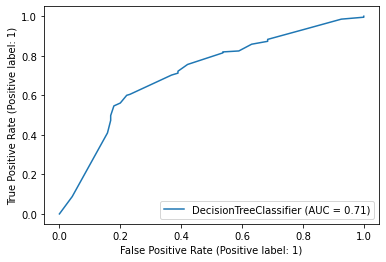

In [ ]:
# roc curve (auc 값 책에서는 67%)

from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, x_test, y_test)

In [ ]:
#시각화 (0=DV=credit rating)
credit_df.iloc[:,0].unique()

array([1, 0], dtype=int64)

In [2]:
from matplotlib import pyplot as plt

from sklearn.tree import * 


plt.figure( figsize=(20, 15) )

plot_tree( clf,
           class_names = clf.classes_,
           feature_names = list(credit_df.iloc[:,1:21]),
           filled = True,
           node_ids = True,
           fontsize = 10 )

plt.show()

NameError: ignored

<Figure size 1440x1080 with 0 Axes>

# multiple split

In [ ]:
# iris data loading, 확인

import seaborn as sns
from sklearn.datasets import load_iris 
iris=load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# train 70% - test 30% split 
X_train, X_test, y_train, y_test = train_test_split(iris_df.loc[:,:'petal_width'], iris_df['species'], test_size=0.3, random_state=42)

In [ ]:
# 의사결정트리 만들기
clf2=DecisionTreeClassifier(max_depth=7,min_samples_split=5, criterion='entropy', random_state=153)

In [ ]:
# training (test set)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5,
                       random_state=153)

In [ ]:
#예측
preds=clf2.predict(X_test)

In [ ]:
# confusion matrix
confusion_matrix(y_test,preds)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

In [ ]:
# classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# feature importance
clf2.feature_importances_

array([0.        , 0.03922408, 0.33779587, 0.62298005])

# 이게 의미하는 것?

In [ ]:
# 시각화
from sklearn.tree import export_graphviz


In [ ]:
export_graphviz(clf2, out_file='./tree.dot', feature_names=X_test.columns)

In [ ]:
class_names=['0', '1', '2']

In [ ]:
with open('tree.dot') as f:
  dot_graph=f.read()
  display(export_graphviz.Source(dot_graph))

AttributeError: 'function' object has no attribute 'Source'